# Question 8

In [1]:
import numpy as np
import scipy as sp

from matplotlib import pyplot

import statsmodels.api as sm

C:\Users\Samuel\Anaconda3\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
N=20000
a = sp.random.standard_normal(N)
b = np.random.uniform(-np.sqrt(3),np.sqrt(3),N)
c = np.random.choice([-1,1],N,0.5)

In [3]:
print(a.mean(),b.mean(),c.mean(),a.std()**2,b.std()**2,c.std()**2)

0.000177124587099 0.00432312794864 -0.0055 1.00573753234 1.00209754628 0.99996975


In [67]:
Xm,Xm2,Xm3,Ya,Yb,Yc = [],[],[],[],[],[]
XYa,XYb,XYc = [],[],[]
b0,b1=1,2
for m in range(N):
    Xm.append(np.random.choice(a)), Xm2.append(np.random.choice(b)),Xm3.append(np.random.choice(c))
    Ya.append(b0+b1*Xm[m]+a[m]),Yb.append(b0+b1*Xm[m]+b[m]),Yc.append(b0+b1*Xm[m]+c[m])
    XYa.append([Xm[m],Ya[m]]),XYb.append([Xm[m],Yb[m]]),XYc.append([Xm[m],Yc[m]])
#print(len(Ya))

#Simulate three different bivariate models
model1 = sm.OLS(Ya,Xm).fit()
model1.summary()
model2 = sm.OLS(Yb,Xm).fit()
model3 = sm.OLS(Yc,Xm).fit()

In [87]:
 #Question (8a)
M,S=2000,100
Sa,Sb,Sc=[],[],[]
for s in range(S):
    Sa.append([XYa[i] for i in np.random.choice(len(XYa),M)])
    Sb.append([XYb[i] for i in np.random.choice(len(XYb),M)])
    Sc.append([XYc[i] for i in np.random.choice(len(XYc),M)])
print(len(Sa[99]))

2000


In [88]:
import statistics as sp
xbar,ybar,xbara,ybara=[],[],[],[]
xbar1,ybar1,xbarb,ybarb=[],[],[],[]
xbar2,ybar2,xbarc,ybarc=[],[],[],[]

for s in range(S):
    xbar.append([Sa[s][i][0] for i in range(M)])
    ybar.append([Sa[s][i][1] for i in range(M)])
    
    xbar1.append([Sb[s][i][0] for i in range(M)])
    ybar1.append([Sb[s][i][1] for i in range(M)])
    
    xbar2.append([Sc[s][i][0] for i in range(M)])
    ybar2.append([Sc[s][i][1] for i in range(M)])


    xbara.append(sp.mean(xbar[s]))
    ybara.append(sp.mean(ybar[s]))
    
    xbarb.append(sp.mean(xbar1[s]))
    ybarb.append(sp.mean(ybar1[s]))
    
    xbarc.append(sp.mean(xbar2[s]))
    ybarc.append(sp.mean(ybar2[s]))
    
print(len(xbara),len(xbarb),len(xbarc))

100 100 100


In [89]:
beta1a,beta1b,beta1c=[],[],[]
for s in range(S):
    numa=np.sum([(Sa[s][i][0]-xbara[s])*(Sa[s][i][1]-ybara[s]) for i in range(M)])
    denoma=np.sum([(Sa[s][i][0]-xbara[s])**2 for i in range(M)])
    beta1a.append(numa/denoma)
    
    numb=np.sum([(Sb[s][i][0]-xbarb[s])*(Sb[s][i][1]-ybarb[s]) for i in range(M)])
    denomb=np.sum([(Sb[s][i][0]-xbarb[s])**2 for i in range(M)])
    beta1b.append(numb/denomb)
    
    numc=np.sum([(Sc[s][i][0]-xbarc[s])*(Sc[s][i][1]-ybarc[s]) for i in range(M)])
    denomc=np.sum([(Sc[s][i][0]-xbarc[s])**2 for i in range(M)])
    beta1c.append(numc/denomc)
print(len(beta1a),len(beta1b),len(beta1c))

100 100 100


In [90]:
beta= np.array([beta1a,beta1b,beta1c])
tda,tdb,tdc=[],[],[]

for s in range(S):
    num = np.sqrt(M)*(beta[0][s]-b1)
    v = np.sum([(Sa[s][i][1]-ybara[s]-beta[0][s]*(Sa[s][i][0]-xbara[s]))**2 for i in range(M)])
    w = np.sum([(Sa[s][i][0]-xbara[s])**2 for i in range(M)])
    denum=np.sqrt(v/w)
    tda.append(num/denum)
    
    tnumb = np.sqrt(M)*(beta[1][s]-b1)
    vb = np.sum([(Sb[s][i][1]-ybarb[s]-beta[1][s]*(Sb[s][i][0]-xbarb[s]))**2 for i in range(M)])
    wb = np.sum([(Sb[s][i][0]-xbarb[s])**2 for i in range(M)])
    tdenumb=np.sqrt(vb/wb)
    tdb.append(tnumb/tdenumb)

    tnumc = np.sqrt(M)*(beta[2][s]-b1)
    vc = np.sum([(Sc[s][i][1]-ybarc[s]-beta[2][s]*(Sc[s][i][0]-xbarc[s]))**2 for i in range(M)])
    wc = np.sum([(Sc[s][i][0]-xbarc[s])**2 for i in range(M)])
    tdenumc=np.sqrt(vc/wc)
    tdc.append(tnumc/tdenumc)
    
print(len(tda),len(tdb),len(tdc)) 

100 100 100


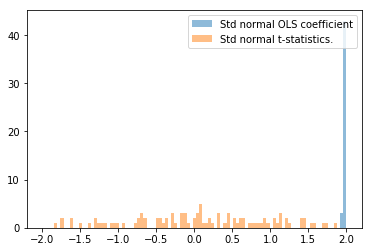

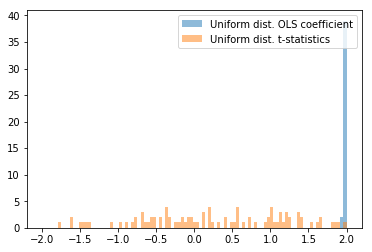

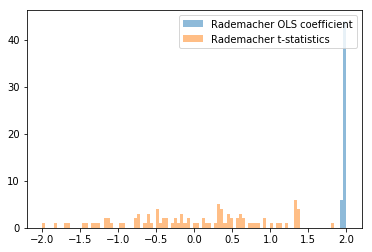

In [91]:
#Histogram plot
bins = np.linspace(-2, 2, 100)

pyplot.hist(beta1a, bins, alpha=0.5, label='Std normal OLS coefficient')
pyplot.hist(tda,bins, alpha=0.5, label='Std normal t-statistics.')
pyplot.legend(loc='upper right')
pyplot.show()

pyplot.hist(beta1b, bins, alpha=0.5, label='Uniform dist. OLS coefficient')
pyplot.hist(tdb,bins, alpha=0.5, label='Uniform dist. t-statistics')
pyplot.legend(loc='upper right')
pyplot.show()

pyplot.hist(beta1c, bins, alpha=0.5, label='Rademacher OLS coefficient')
pyplot.hist(tdc,bins, alpha=0.5, label='Rademacher t-statistics')
pyplot.legend(loc='upper right')
pyplot.show()

# Question 9

In [65]:
N,pi0,pi1,delta0,delta1=10000,1,2,1,2
Xi=np.random.choice([1,2,3,4,5],10000)
vi,ei=a,a   #vi and ei are standard normal distribution
Si,Yi=[],[]
for i in range(N):
    si=pi0+pi1*Xi[i]+vi[i]
    Si.append(si)
    yi=delta0+delta1*Si[i]+np.log(Xi[i])+ei[i]    #we choose the logarithmic function as the non-linear function of choice.
    Yi.append(yi)
print(len(Si),len(Yi))

10000 10000


In [66]:
#Question(9a)
model = sm.OLS(Yi, Si).fit()
predictions = model.predict(Si) # make the predictions by the model
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 5.048e+06
Date:                Mon, 09 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:32:19   Log-Likelihood:                -11677.
No. Observations:               10000   AIC:                         2.336e+04
Df Residuals:                    9999   BIC:                         2.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.2804      0.001   2246.849      0.000       2.278       2.282
==============================================================================
Omnibus:                        0.206   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.902   Jarque-Bera (JB):                0.178
Skew:                          -0.004   Prob(JB):                        0.915
Kurtosis:                       3.019   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#Question (9b)
D1,D2,D3,D4,D5 = [],[],[],[],[]   #Dummy variables
for i in range(N):
    if Xi[i]==1:
        D1.append(1)
    else:
        D1.append(0)
    if Xi[i]==2:
        D2.append(1)     
    else:
        D2.append(0)
    if Xi[i]==3:
        D3.append(1)     
    else:
        D3.append(0)
    if Xi[i]==4:
        D4.append(1)     
    else:
        D4.append(0)
    if Xi[i]==5:
        D5.append(1)     
    else:
        D5.append(0)

In [63]:
D=np.array([D1,D2,D3,D4,D5])  #dummy variables.

In [ ]:
#Question (9c)
Yia,Xisquare = [],[]
for i in range(N):
    yia=delta0+delta1*Si[i]+Xi[i]**2+ei[i]
    Yia.append(yia)
    Xisquare.append(Xi[i]**2)
model =sm.OLS(Yia,Si,Xisquare).fit()
model.summary()

In [ ]:
#Question(9d)